In [1]:
!git clone https://github.com/niazwazir/SENextIMAGESR.git

Cloning into 'SENextIMAGESR'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 41 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [2]:
cd SENextIMAGESR/

/content/SENextIMAGESR


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt,glob
from tensorflow. keras.models import load_model

In [4]:
#UPLOAD THE PRE_TRAINED MODEL
sr_model = load_model('Wazir_Model_Scale_X2.h5')

In [5]:
#INPUT SIZE
input_size=128
scale = 2

In [6]:
#READ THE TEST DATASET
Test_Set = glob.glob('Set5/*.*', recursive=True)
#NUMBER OF IMAGES AVAILABLE IN TEST FOLDER
len(Test_Set)

5

In [7]:
def read_image(img_path,scale=scale):
    global input_size
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_lr = cv2.resize(img, (input_size,input_size),interpolation=cv2.INTER_CUBIC)
    img_hr = cv2.resize(img, (input_size*scale,input_size*scale),interpolation=cv2.INTER_CUBIC)
    return img_lr,img_hr

In [14]:
tlr,hlr=read_image(Test_Set[2])
tlr=np.expand_dims(tlr,axis=0)
pred=sr_model.predict(tlr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


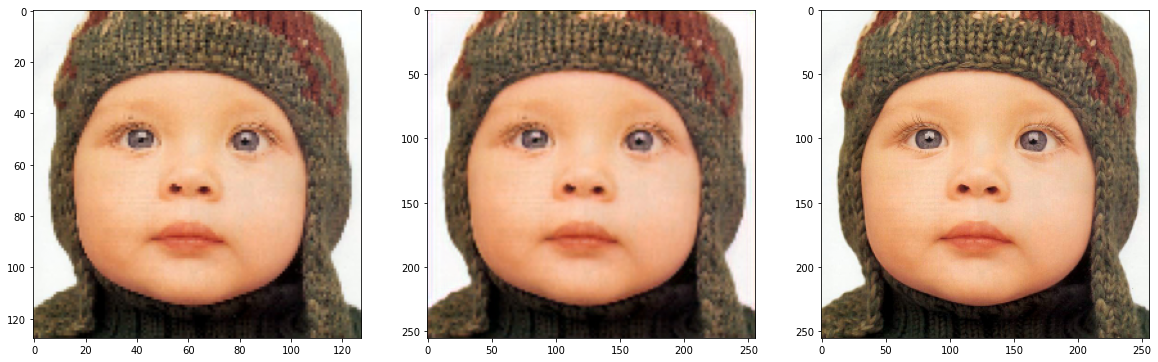

In [15]:
_,axs=plt.subplots(1,3,figsize=(20,20))
ax=axs.flat
ax[0].imshow(tlr[0]/255.)
ax[1].imshow(pred[0]/255.)
ax[2].imshow(hlr/255.)